<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/DataCamp%20Courses%20Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing()
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('all_tracks.csv')
df.shape

(115, 18)

In [3]:
df

track_id                       track_title is_career  course_count  \
0           1             AI Agent Fundamentals        No             3   
1           2          AI Business Fundamentals        No             7   
2           3                   AI Fundamentals        No             6   
3           4  AWS Cloud Practitioner (CLF-C02)        No             4   
4           5              Alteryx Fundamentals        No             4   
..        ...                               ...       ...           ...   
110       111       Tidyverse Fundamentals in R        No             5   
111       112                 Time Series  in R        No             5   
112       113             Time Series in Python        No             5   
113       114         Understanding Data Topics        No             5   
114       115                  dbt Fundamentals        No             2   

     total_chapters  total_exercises  total_videos  total_xp  \
0                 8               82            28    5350.0   
1                21              260            82   17250.0   
2                20              237            76   15400.0   
3                12              147            47   10250.0   
4                14               89            33    6950.0   
..              ...              ...           ...       ...   
110              20              250            76   20650.0   
111              22              252            73   20300.0   
112              22              283            78   23800.0   
113              17              188            63   11800.0   
114               5               54            16    4400.0   

     avg_xp_per_course  avg_time_hours  total_duration_hours  datasets_count  \
0          1783.333333        1.666667                   4.0               2   
1          2464.285714        1.571429                  11.0               2   
2          2566.666667        1.666667                  10.0               2   
3          2562.500000        2.500000                  10.0               0   
4          1737.500000        2.500000                  10.0               6   
..                 ...             ...                   ...             ...   
110        4130.000000        4.000000                  20.0              11   
111        4060.000000        4.200000                  21.0              10   
112        4760.000000        4.000000                  20.0              17   
113        2360.000000        2.000000                  10.0               2   
114        2200.000000        3.000000                   6.0               0   

    programming_languages course_difficulty_levels  predominant_difficulty  \
0                python,r                        1                       1   
1                       r                        1                       1   
2                       r                        1                       1   
3                       r                        1                       1   
4                  python                        1                       1   
..                    ...                      ...                     ...   
110                     r                      1,2                       1   
111                     r                        2                       2   
112                python                      2,3                       2   
113                     r                        1                       1   
114                python                      2,3                       2   

                                         course_titles  \
0    Building Scalable Agentic Systems,Generative A...   
1    AI Ethics,Artificial Intelligence (AI) Strateg...   
2    AI Ethics,Generative AI Concepts,Large Languag...   
3    AWS Cloud Technology and Services Concepts,AWS...   
4    Data Manipulation in Alteryx,Data Preparation ...   
..                                                 ...   
110  Categorical Data in the Ti

In [4]:
df.dtypes

track_id                      int64
track_title                  object
is_career                    object
course_count                  int64
total_chapters                int64
total_exercises               int64
total_videos                  int64
total_xp                    float64
avg_xp_per_course           float64
avg_time_hours              float64
total_duration_hours        float64
datasets_count                int64
programming_languages        object
course_difficulty_levels     object
predominant_difficulty        int64
course_titles                object
instructors                  object
participant_count            object
dtype: object

In [5]:
df.describe().T

count          mean           std          min  \
track_id                115.0     58.000000     33.341666     1.000000   
course_count            115.0      6.052174      3.997463     2.000000   
total_chapters          115.0     22.521739     16.299471     4.000000   
total_exercises         115.0    276.200000    204.963720    43.000000   
total_videos            115.0     80.947826     57.421165    14.000000   
total_xp                115.0  21743.478261  16604.489091  3450.000000   
avg_xp_per_course       115.0   3499.666146    868.727692  1616.666667   
avg_time_hours          115.0      3.389974      0.896395     1.000000   
total_duration_hours    115.0     21.052174     16.199872     3.000000   
datasets_count          115.0     13.652174     16.942650     0.000000   
predominant_difficulty  115.0      1.582609      0.606726     1.000000   

                                 25%       50%           75%           max  
track_id                   29.500000     58.00     86.500000    115.000000  
course_count                4.000000      5.00      7.000000     23.000000  
total_chapters             12.000000     17.00     25.000000     92.000000  
total_exercises           159.500000    216.00    320.500000   1170.000000  
total_videos               46.000000     61.00     90.000000    327.000000  
total_xp                12375.000000  17050.00  26025.000000  94800.000000  
avg_xp_per_course        2820.833333   3775.00   4216.071429   4960.000000  
avg_time_hours              2.911111      3.75      4.000000      5.142857  
total_duration_hours       12.000000     16.00     25.000000     90.000000  
datasets_count              3.000000      9.00     18.000000    108.000000  
predominant_difficulty      1.000000      2.00      2.000000      3.000000

In [6]:
df['track_title'].value_counts()

track_title
AI Agent Fundamentals               1
AI Business Fundamentals            1
AI Fundamentals                     1
AWS Cloud Practitioner (CLF-C02)    1
Alteryx Fundamentals                1
                                   ..
Tidyverse Fundamentals in R         1
Time Series  in R                   1
Time Series in Python               1
Understanding Data Topics           1
dbt Fundamentals                    1
Name: count, Length: 115, dtype: int64

In [7]:
df['track_id'].value_counts()

track_id
1      1
2      1
3      1
4      1
5      1
      ..
111    1
112    1
113    1
114    1
115    1
Name: count, Length: 115, dtype: int64

In [9]:
df['total_exercises'].value_counts()

total_exercises
82     3
260    3
147    2
283    2
139    2
      ..
295    1
227    1
250    1
252    1
54     1
Name: count, Length: 97, dtype: int64

In [10]:
df['total_xp'].value_counts()

total_xp
14000.0    3
25700.0    2
19100.0    2
11350.0    2
12800.0    2
          ..
20650.0    1
20300.0    1
23800.0    1
11800.0    1
4400.0     1
Name: count, Length: 107, dtype: int64

In [26]:
df.loc[df.programming_languages == 'python']

track_id                               track_title is_career  \
4           5                      Alteryx Fundamentals        No   
6           7                 Applied Finance in Python        No   
8           9              Applied Statistics in Python        No   
19         20                     Big Data with PySpark        No   
20         21                   Building APIs in Python        No   
21         22  Building Applications with OOP in Python        No   
24         25      Data Analysis with Excel Power Tools        No   
25         26                   Data Analyst  in Python       Yes   
28         29                  Data Analyst in Power BI       Yes   
29         30                   Data Analyst in Tableau       Yes   
33         34              Data Manipulation  in Python        No   
40         41              Data Visualization in Python        No   
41         42   Data Visualization with Plotly and Dash        No   
43         44                   Deep Learning in Python        No   
46         47    Developing Applications with LangChain        No   
49         50                        Excel Fundamentals        No   
51         52            Finance Fundamentals in Python        No   
54         55           Financial Reporting in Power BI        No   
59         60                Image Processing in Python        No   
60         61      Importing & Cleaning Data  in Python        No   
67         68                        KNIME Fundamentals        No   
68         69                        Keras Fundamentals        No   
69         70                        Llama Fundamentals        No   
72         73   Machine Learning Fundamentals in Python        No   
74         75      Machine Learning Scientist in Python       Yes   
77         78             Marketing Analytics in Python        No   
80         81     Natural Language Processing in Python        No   
81         82                       OpenAI Fundamentals        No   
82         83                     Power BI Fundamentals        No   
84         85                  Python Data Fundamentals        No   
86         87                        Python Programming        No   
87         88           Python Programming Fundamentals        No   
88         89                Python Programming Toolbox        No   
92         93          Reinforcement Learning in Python        No   
104       105        Statistics Fundamentals  in Python        No   
106       107     Supervised Machine Learning in Python        No   
108       109                      Tableau Fundamentals        No   
112       113                     Time Series in Python        No   
114       115                          dbt Fundamentals        No   

     course_count  total_chapters  total_exercises  total_videos  total_xp  \
4               4              14               89            33    6950.0   
6               4              16              216            58   17550.0   
8               4              16              195            58   15750.0   
19              6              23              316            90   25700.0   
20              4              11              129            40   10550.0   
21              3               9              106            32    8450.0   
24              3              11               74            25    5850.0   
25              9              37              488           132   40050.0   
28             15              56              387           135   30350.0   
29              7              24              358           125   28950.0   
33              4              16              208            58   17600.0   
40              4              16              193            57   16200.0   
41              2               8               93            29    7550.0   
43              5              18              231            70   18600.0   
46              3               9              105            33    8700.0

In [29]:
df.iloc[:10,[0,1,4,6,8,10]]

track_id                              track_title  total_chapters  \
0         1                    AI Agent Fundamentals               8   
1         2                 AI Business Fundamentals              21   
2         3                          AI Fundamentals              20   
3         4         AWS Cloud Practitioner (CLF-C02)              12   
4         5                     Alteryx Fundamentals              14   
5         6              Analyzing Genomic Data in R              16   
6         7                Applied Finance in Python              16   
7         8                     Applied Finance in R              27   
8         9             Applied Statistics in Python              16   
9        10  Artificial Intelligence (AI) Leadership              12   

   total_videos  avg_xp_per_course  total_duration_hours  
0            28        1783.333333                   4.0  
1            82        2464.285714                  11.0  
2            76        2566.666667                  10.0  
3            47        2562.500000                  10.0  
4            33        1737.500000                  10.0  
5            58        3687.500000                  16.0  
6            58        4387.500000                  16.0  
7            99        4341.666667                  26.0  
8            58        3937.500000                  16.0  
9            46        2075.000000                   6.0

In [36]:
df.loc[df.course_count]

track_id                       track_title is_career  course_count  \
3          4  AWS Cloud Practitioner (CLF-C02)        No             4   
7          8              Applied Finance in R        No             6   
6          7         Applied Finance in Python        No             4   
4          5              Alteryx Fundamentals        No             4   
4          5              Alteryx Fundamentals        No             4   
..       ...                               ...       ...           ...   
5          6       Analyzing Genomic Data in R        No             4   
5          6       Analyzing Genomic Data in R        No             4   
5          6       Analyzing Genomic Data in R        No             4   
5          6       Analyzing Genomic Data in R        No             4   
2          3                   AI Fundamentals        No             6   

    total_chapters  total_exercises  total_videos  total_xp  \
3               12              147            47   10250.0   
7               27              333            99   26050.0   
6               16              216            58   17550.0   
4               14               89            33    6950.0   
4               14               89            33    6950.0   
..             ...              ...           ...       ...   
5               16              191            58   14750.0   
5               16              191            58   14750.0   
5               16              191            58   14750.0   
5               16              191            58   14750.0   
2               20              237            76   15400.0   

    avg_xp_per_course  avg_time_hours  total_duration_hours  datasets_count  \
3         2562.500000        2.500000                  10.0               0   
7         4341.666667        4.333333                  26.0              12   
6         4387.500000        4.000000                  16.0              16   
4         1737.500000        2.500000                  10.0               6   
4         1737.500000        2.500000                  10.0               6   
..                ...             ...                   ...             ...   
5         3687.500000        4.000000                  16.0              10   
5         3687.500000        4.000000                  16.0              10   
5         3687.500000        4.000000                  16.0              10   
5         3687.500000        4.000000                  16.0              10   
2         2566.666667        1.666667                  10.0               2   

   programming_languages course_difficulty_levels  predominant_difficulty  \
3                      r                        1                       1   
7                      r                    1,2,3                       2   
6                 python                      2,3                       2   
4                 python                        1                       1   
4                 python                        1                       1   
..                   ...                      ...                     ...   
5                      r                      2,3                       2   
5                      r                      2,3                       2   
5                      r                      2,3                       2   
5                      r                      2,3                       2   
2                      r                        1                       1   

                                        course_titles  \
3   AWS Cloud Technology and Services Concepts,AWS...   
7   Bond Valuation and Analysis in R,Credit Risk M...   
6   Credit Risk Modeling in Python,GARCH Models in...   
4   Data Manipulation in Alteryx,Data Preparation ...   
4   Data Manipulation in Alteryx,Data Preparation ...   
..                                                ...   
5   ChIP-seq with Bioconductor in R,Differential E...   
5   ChIP-seq with Bioconduct

In [12]:
df.dropna(inplace=True)
df.shape

(115, 18)

In [13]:
df.isna().sum()

track_id                    0
track_title                 0
is_career                   0
course_count                0
total_chapters              0
total_exercises             0
total_videos                0
total_xp                    0
avg_xp_per_course           0
avg_time_hours              0
total_duration_hours        0
datasets_count              0
programming_languages       0
course_difficulty_levels    0
predominant_difficulty      0
course_titles               0
instructors                 0
participant_count           0
dtype: int64

In [14]:
df.reset_index(inplace=True,drop=True)

In [15]:
df.head()

track_id                       track_title is_career  course_count  \
0         1             AI Agent Fundamentals        No             3   
1         2          AI Business Fundamentals        No             7   
2         3                   AI Fundamentals        No             6   
3         4  AWS Cloud Practitioner (CLF-C02)        No             4   
4         5              Alteryx Fundamentals        No             4   

   total_chapters  total_exercises  total_videos  total_xp  avg_xp_per_course  \
0               8               82            28    5350.0        1783.333333   
1              21              260            82   17250.0        2464.285714   
2              20              237            76   15400.0        2566.666667   
3              12              147            47   10250.0        2562.500000   
4              14               89            33    6950.0        1737.500000   

   avg_time_hours  total_duration_hours  datasets_count programming_languages  \
0        1.666667                   4.0               2              python,r   
1        1.571429                  11.0               2                     r   
2        1.666667                  10.0               2                     r   
3        2.500000                  10.0               0                     r   
4        2.500000                  10.0               6                python   

  course_difficulty_levels  predominant_difficulty  \
0                        1                       1   
1                        1                       1   
2                        1                       1   
3                        1                       1   
4                        1                       1   

                                       course_titles  \
0  Building Scalable Agentic Systems,Generative A...   
1  AI Ethics,Artificial Intelligence (AI) Strateg...   
2  AI Ethics,Generative AI Concepts,Large Languag...   
3  AWS Cloud Technology and Services Concepts,AWS...   
4  Data Manipulation in Alteryx,Data Preparation ...   

                                         instructors participant_count  
0        Adel Nehme,Carl Rosseel,Korey Stegared-Pace             1,319  
1  Carl Rosseel,Iason Prassides,Iván P.C.,Jacob M...            25,877  
2  Daniel Tedesco,Hadrien Lacroix,Iván P.C.,James...           167,748  
3  Amar Suchak,Dev Bhosale,Lis Sulmont,Rahulraj S...             9,351  
4  Behrang Behjoo,Deanna Sanchez,Iason Prassides,...            10,830

In [16]:
df.to_csv('all_tracks.csv', index = None, header=True)

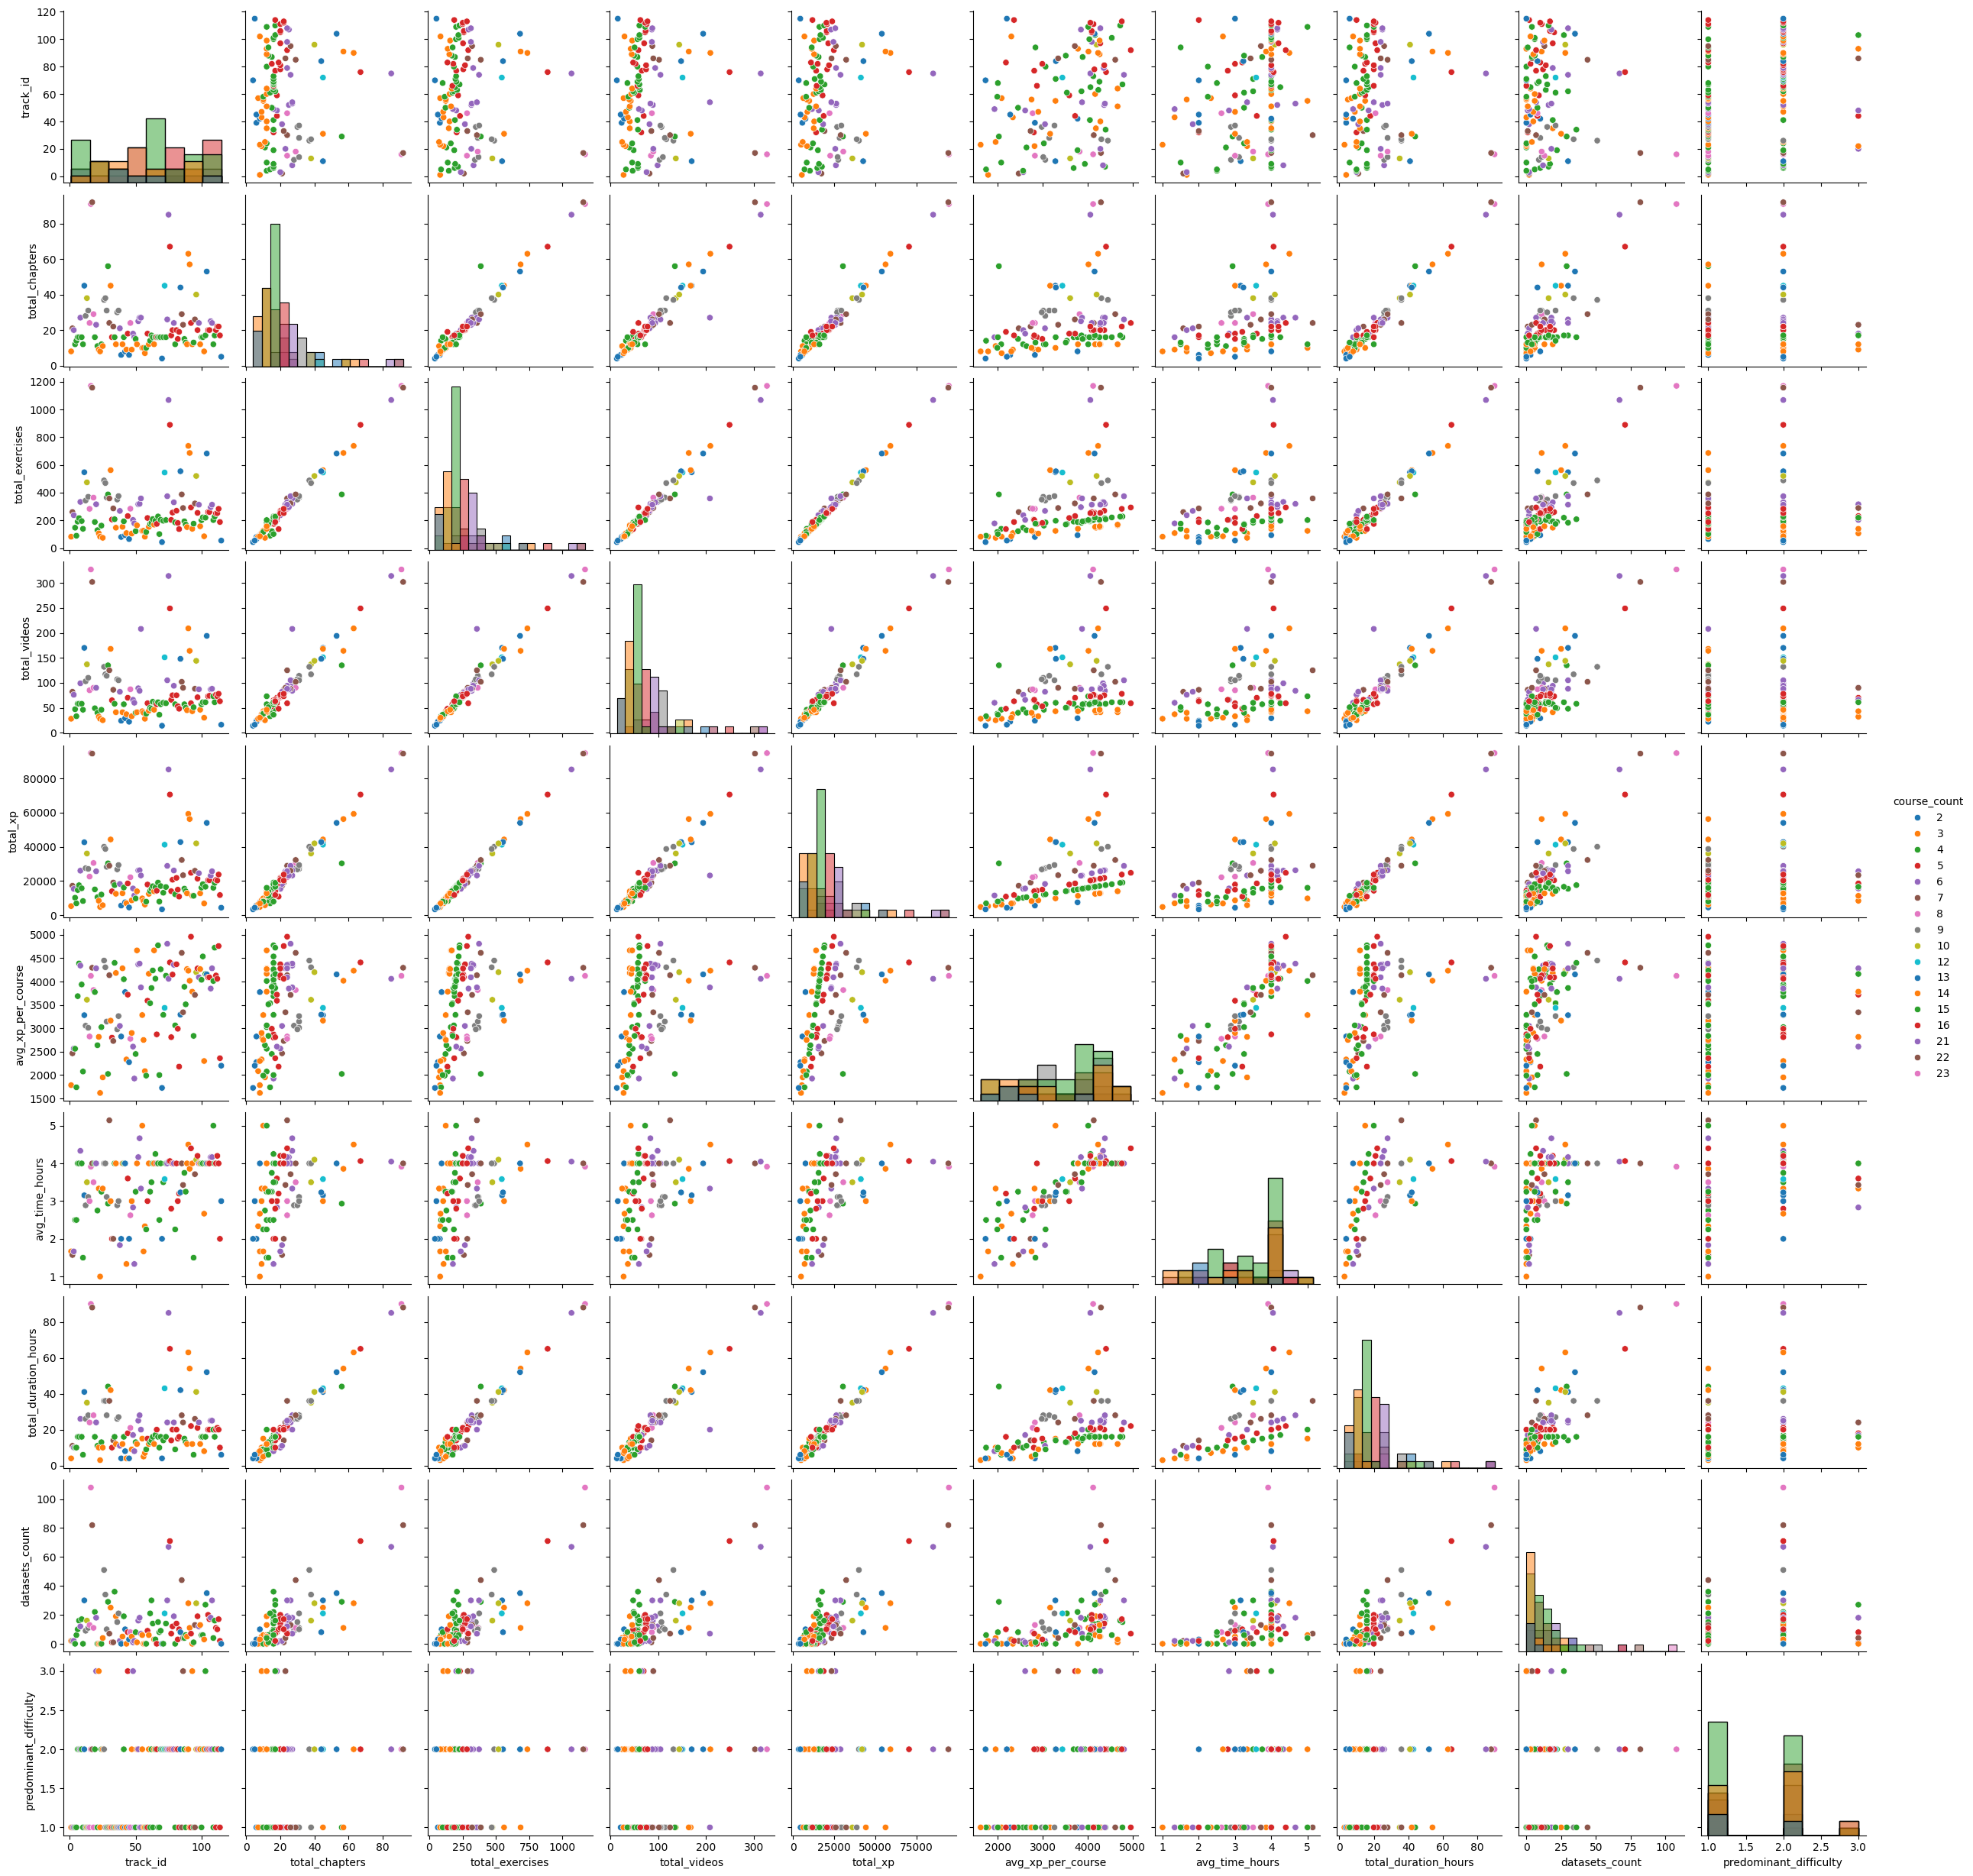

In [17]:
sns.pairplot(data=df, hue='course_count', diag_kind='hist', palette='tab10')

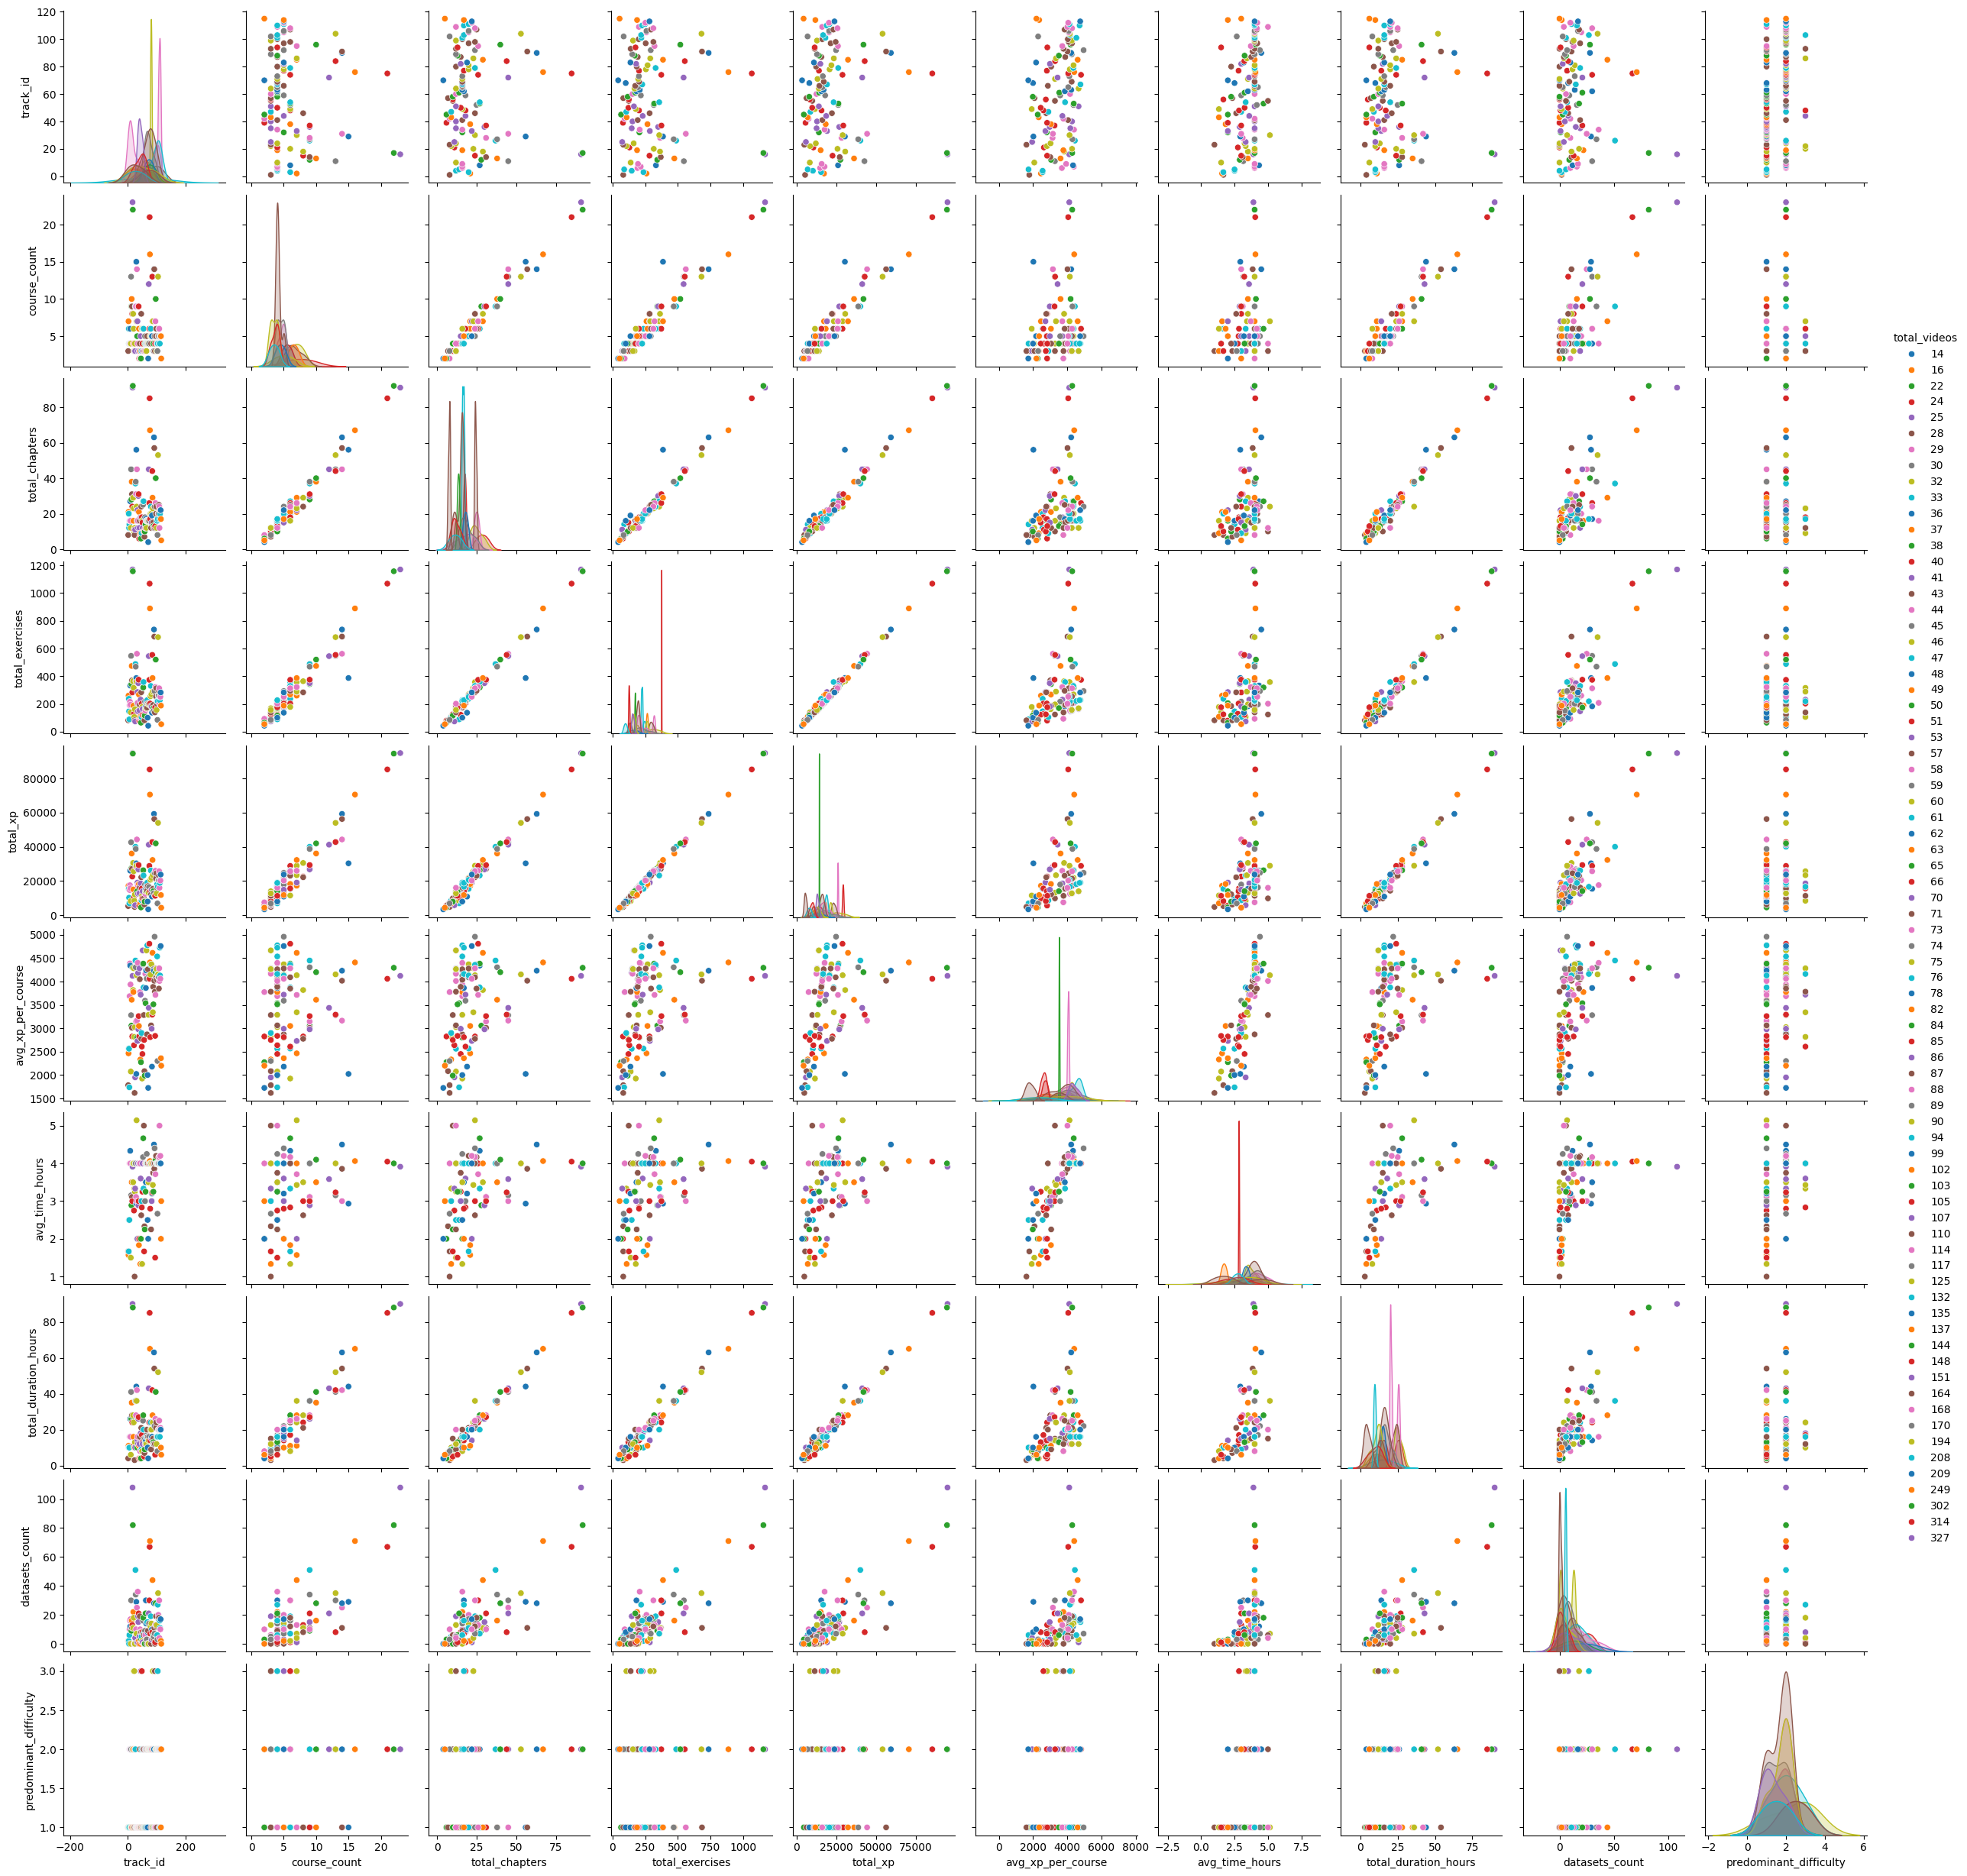

In [37]:
sns.pairplot(data=df, hue='total_videos', palette='tab10')

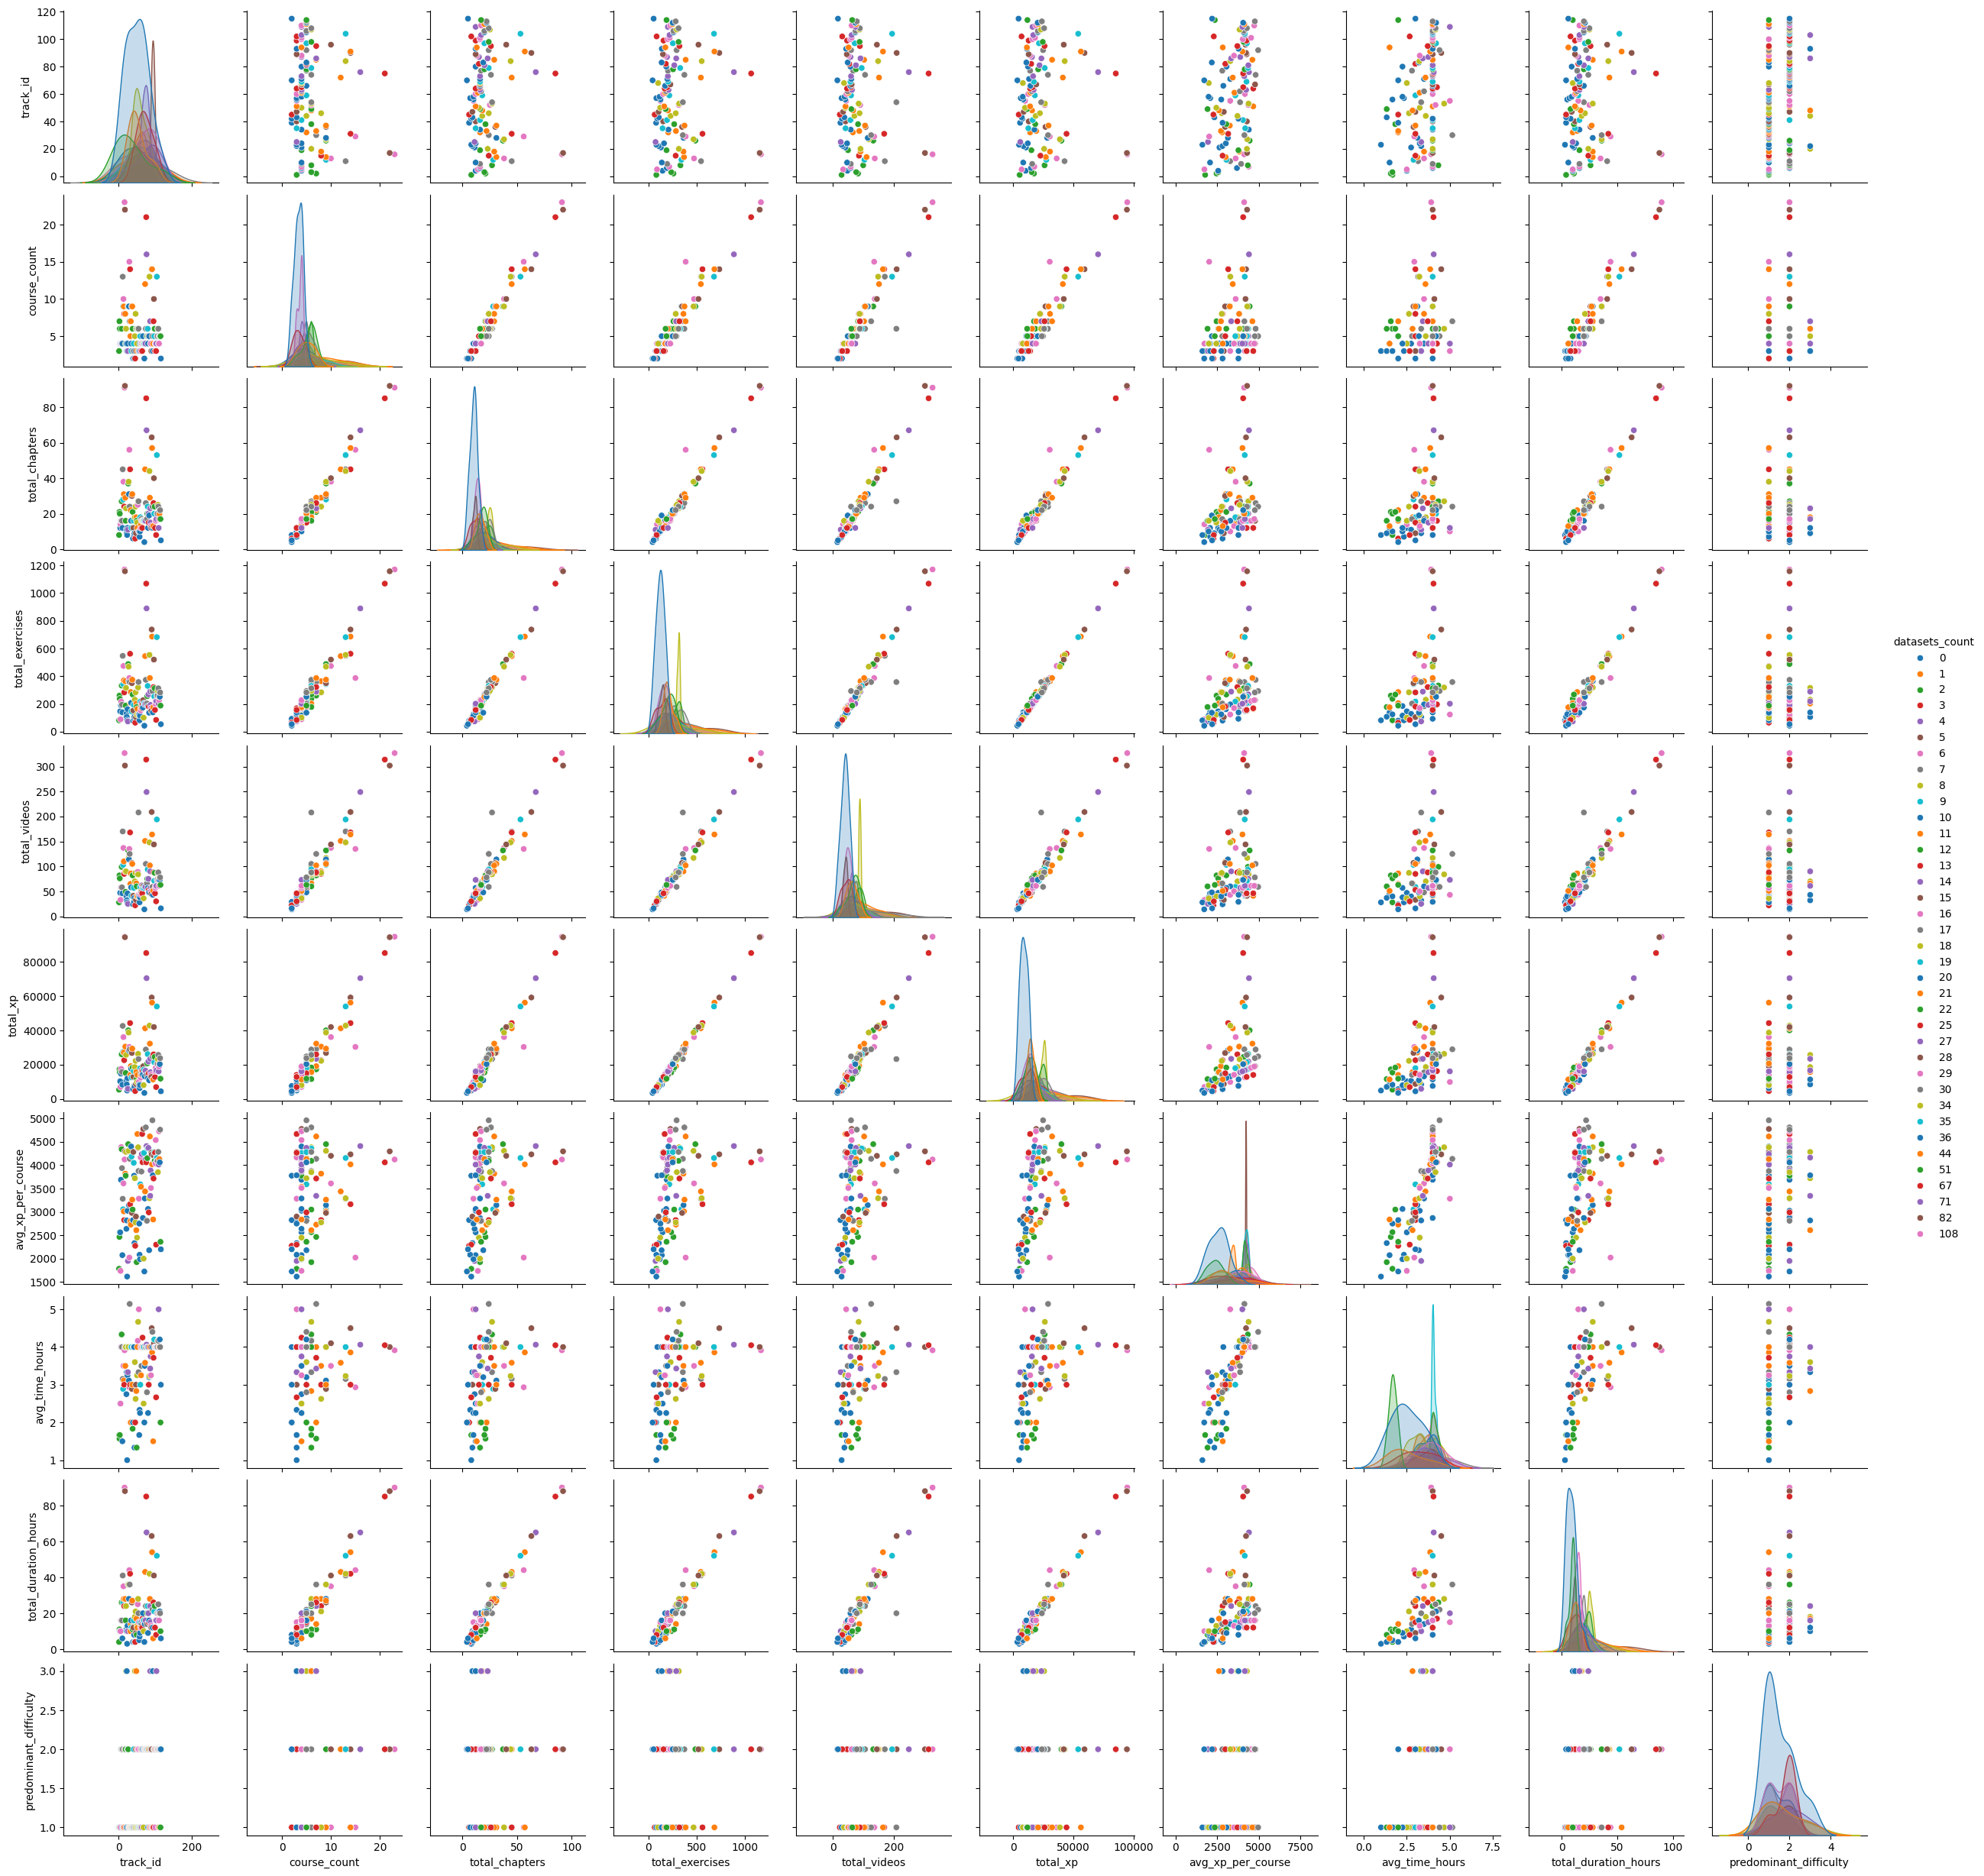

In [38]:
sns.pairplot(data=df, hue='datasets_count', palette='tab10')

In [40]:
df['is_career']=df.is_career.map({'No':0,'Yes':1})
df

track_id                       track_title  is_career  course_count  \
0           1             AI Agent Fundamentals          0             3   
1           2          AI Business Fundamentals          0             7   
2           3                   AI Fundamentals          0             6   
3           4  AWS Cloud Practitioner (CLF-C02)          0             4   
4           5              Alteryx Fundamentals          0             4   
..        ...                               ...        ...           ...   
110       111       Tidyverse Fundamentals in R          0             5   
111       112                 Time Series  in R          0             5   
112       113             Time Series in Python          0             5   
113       114         Understanding Data Topics          0             5   
114       115                  dbt Fundamentals          0             2   

     total_chapters  total_exercises  total_videos  total_xp  \
0                 8               82            28    5350.0   
1                21              260            82   17250.0   
2                20              237            76   15400.0   
3                12              147            47   10250.0   
4                14               89            33    6950.0   
..              ...              ...           ...       ...   
110              20              250            76   20650.0   
111              22              252            73   20300.0   
112              22              283            78   23800.0   
113              17              188            63   11800.0   
114               5               54            16    4400.0   

     avg_xp_per_course  avg_time_hours  total_duration_hours  datasets_count  \
0          1783.333333        1.666667                   4.0               2   
1          2464.285714        1.571429                  11.0               2   
2          2566.666667        1.666667                  10.0               2   
3          2562.500000        2.500000                  10.0               0   
4          1737.500000        2.500000                  10.0               6   
..                 ...             ...                   ...             ...   
110        4130.000000        4.000000                  20.0              11   
111        4060.000000        4.200000                  21.0              10   
112        4760.000000        4.000000                  20.0              17   
113        2360.000000        2.000000                  10.0               2   
114        2200.000000        3.000000                   6.0               0   

    programming_languages course_difficulty_levels  predominant_difficulty  \
0                python,r                        1                       1   
1                       r                        1                       1   
2                       r                        1                       1   
3                       r                        1                       1   
4                  python                        1                       1   
..                    ...                      ...                     ...   
110                     r                      1,2                       1   
111                     r                        2                       2   
112                python                      2,3                       2   
113                     r                        1                       1   
114                python                      2,3                       2   

                                         course_titles  \
0    Building Scalable Agentic Systems,Generative A...   
1    AI Ethics,Artificial Intelligence (AI) Strateg...   
2    AI Ethics,Generative AI Concepts,Large Languag...   
3    AWS Cloud Technology and Services Concepts,AWS...   
4    Data Manipulation in Alteryx,Data Preparation ...   
..                                                 ...   
110  Categorical Da

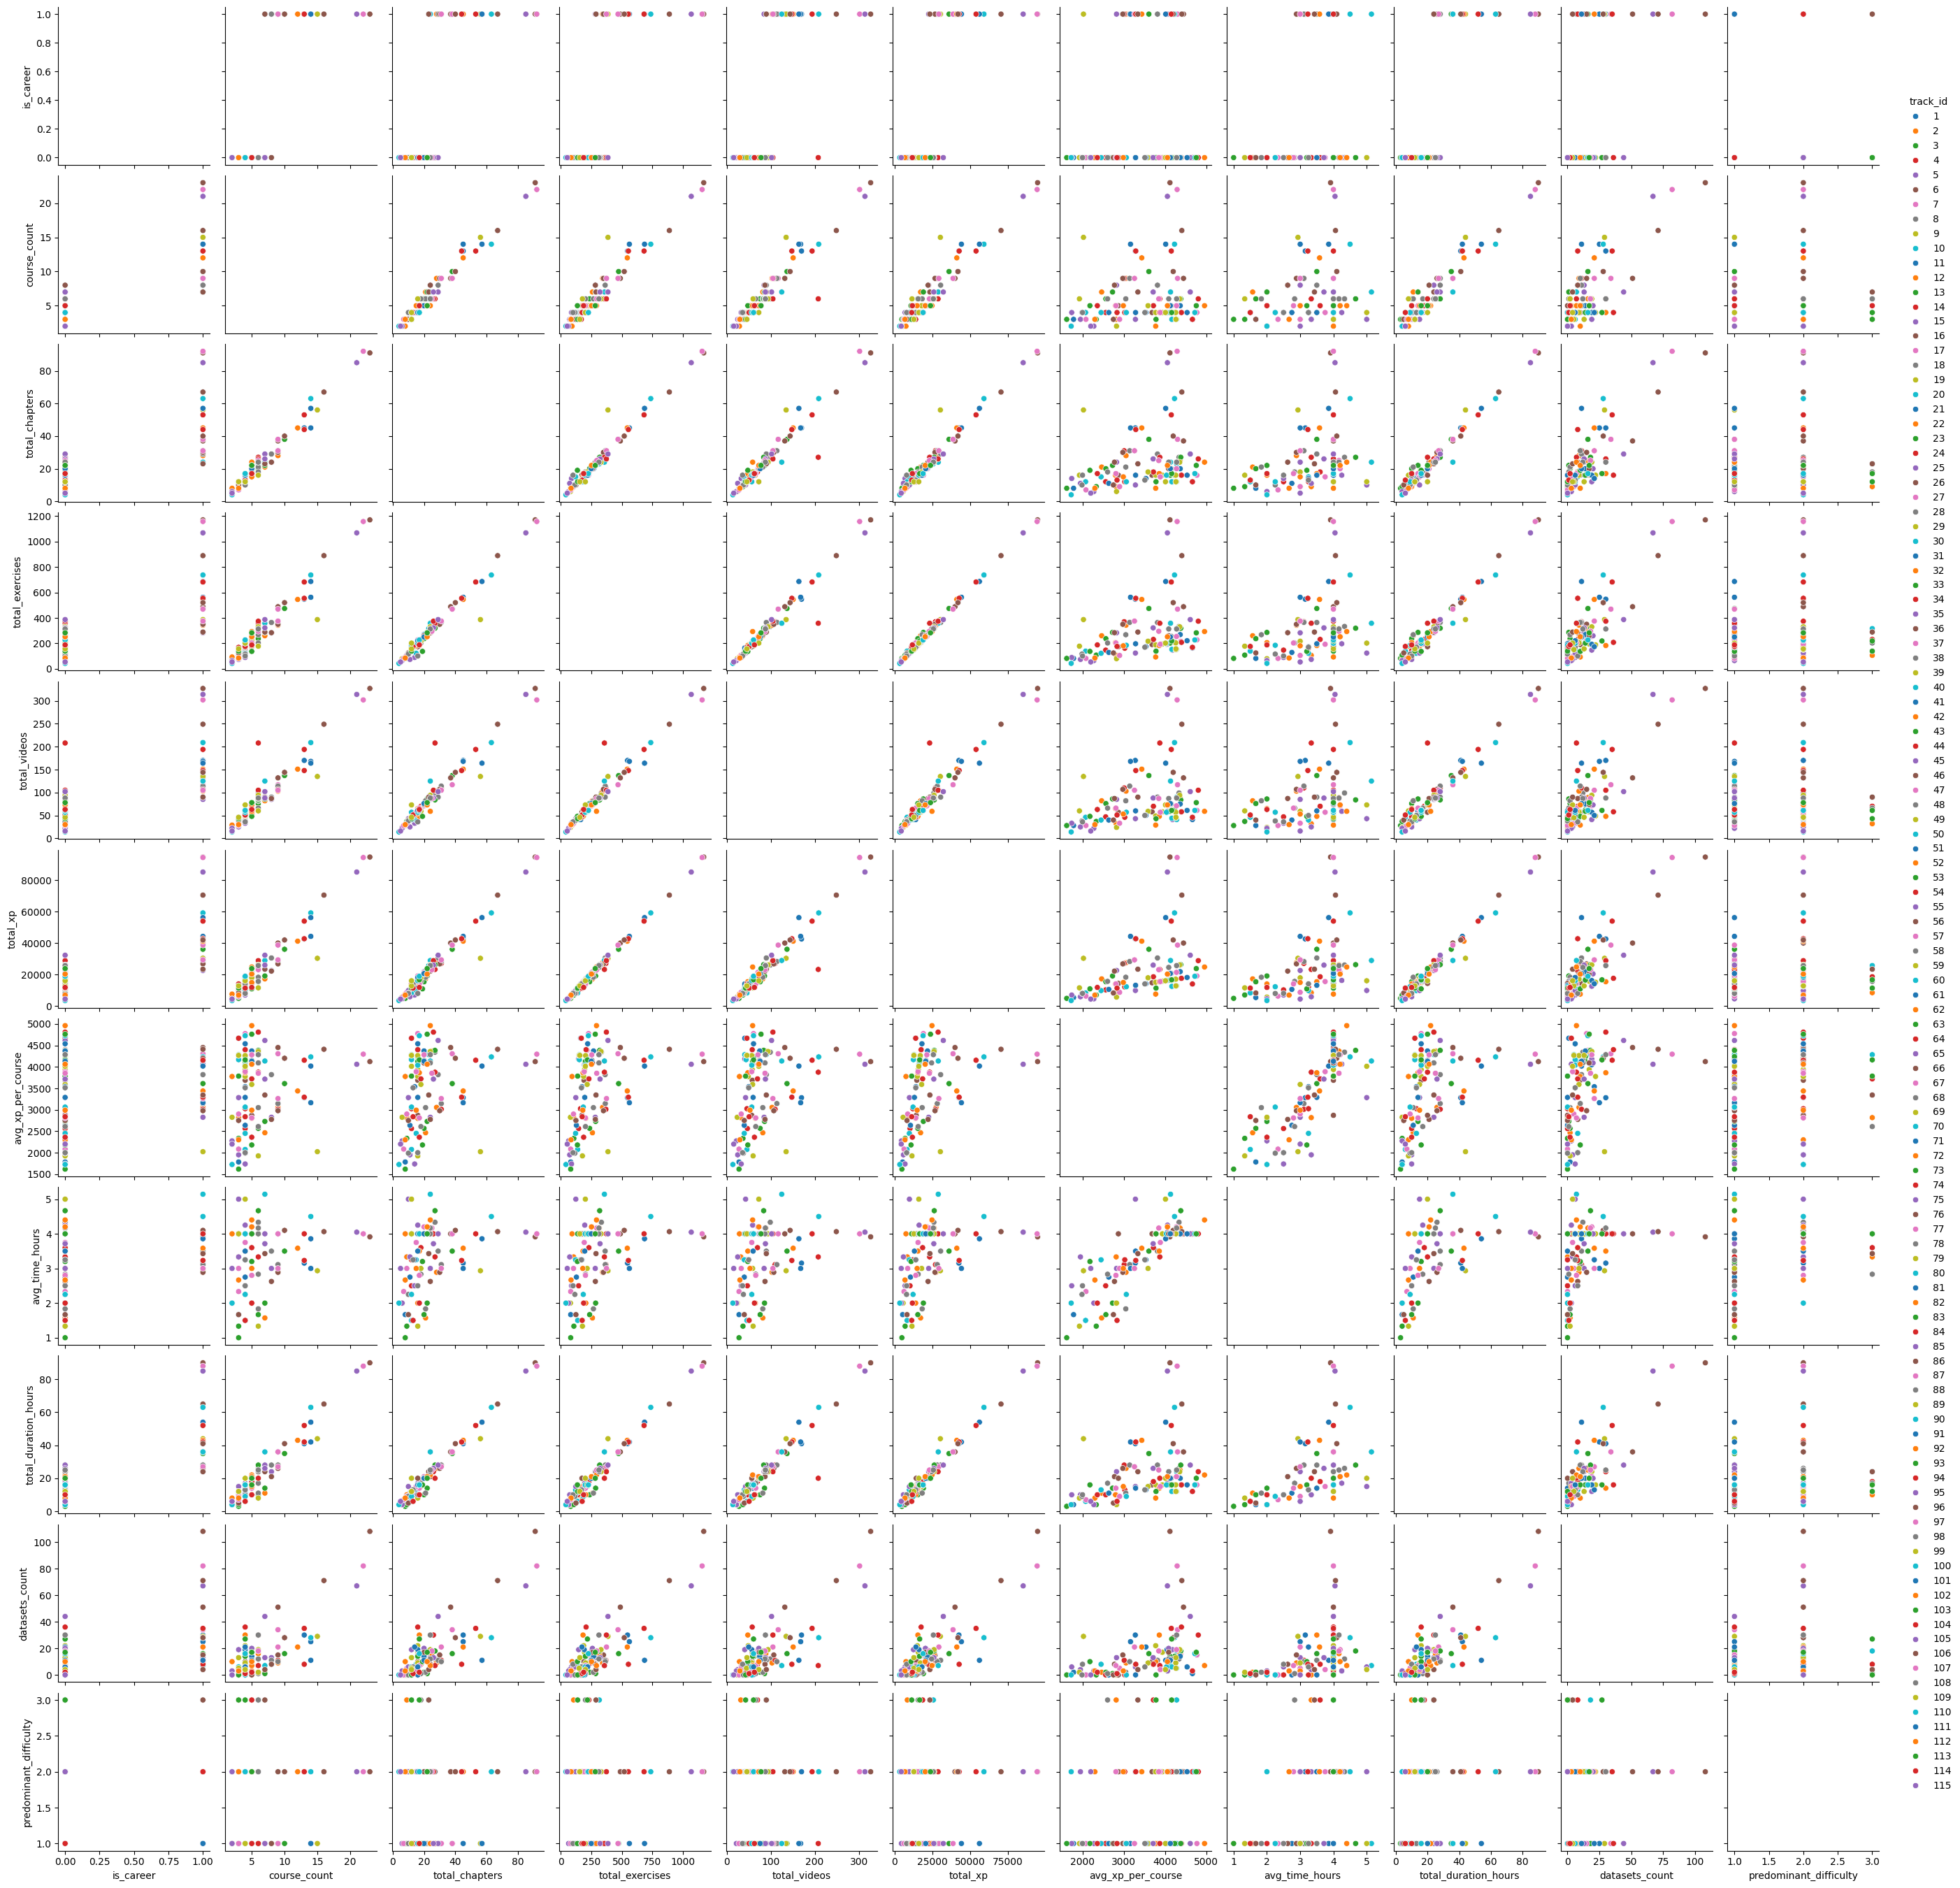

In [41]:
sns.pairplot(data=df, hue='track_id',  palette='tab10')

<Axes: xlabel='predominant_difficulty', ylabel='total_duration_hours'>

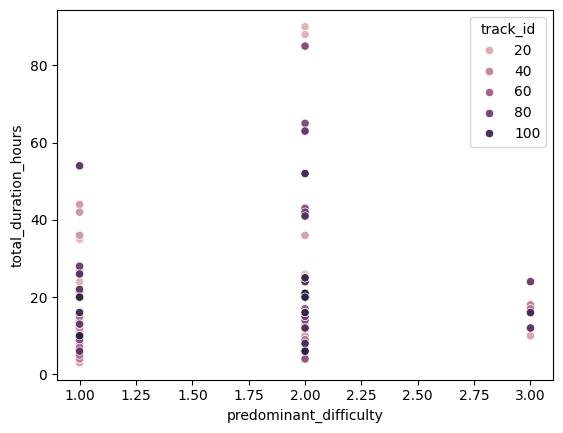

In [46]:
sns.scatterplot(x="predominant_difficulty",
                y="total_duration_hours",
                data=df,
                hue='track_id')

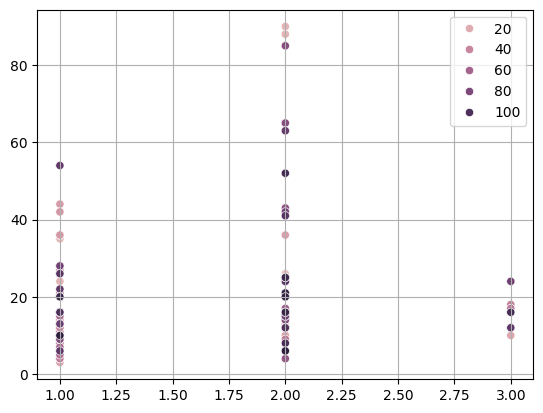

In [47]:
X=np.array(df.loc[:,"predominant_difficulty"])
Y=np.array(df.loc[:,"total_duration_hours"])
color=np.array(df.loc[:,'track_id'])

fig=plt.figure()
sns.scatterplot(x=X,y=Y, hue=color)
plt.grid()
plt.legend()
fig.show()

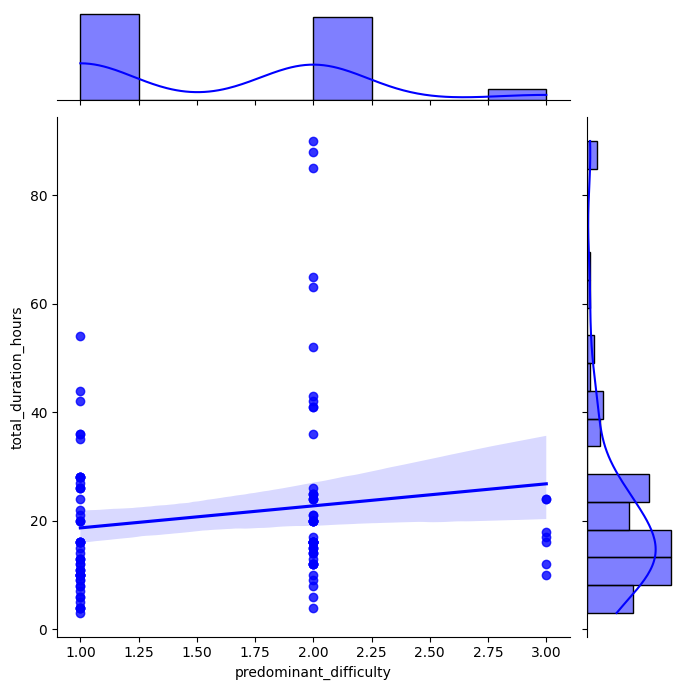

In [48]:
sns.jointplot(x="predominant_difficulty",
              y="total_duration_hours",
              data=df,
              kind="reg",
              color="blue",
              height=7);

<Axes: >

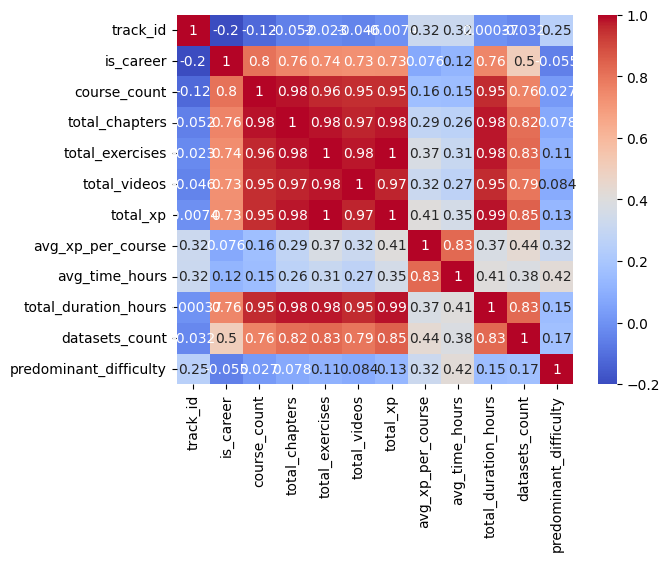

In [51]:
numdf = df.select_dtypes(include=['float64','int64'])
sns.heatmap(numdf.corr(method="pearson"), cmap="coolwarm", annot=True)

In [52]:
df2.head()

is_career  course_count  total_chapters  total_exercises  total_videos  \
0          0             3               8               82            28   
1          0             7              21              260            82   
2          0             6              20              237            76   
3          0             4              12              147            47   
4          0             4              14               89            33   

   total_xp  avg_xp_per_course  avg_time_hours  total_duration_hours  \
0    5350.0        1783.333333        1.666667                   4.0   
1   17250.0        2464.285714        1.571429                  11.0   
2   15400.0        2566.666667        1.666667                  10.0   
3   10250.0        2562.500000        2.500000                  10.0   
4    6950.0        1737.500000        2.500000                  10.0   

   datasets_count programming_languages course_difficulty_levels  \
0               2              python,r                        1   
1               2                     r                        1   
2               2                     r                        1   
3               0                     r                        1   
4               6                python                        1   

   predominant_difficulty                                      course_titles  \
0                       1  Building Scalable Agentic Systems,Generative A...   
1                       1  AI Ethics,Artificial Intelligence (AI) Strateg...   
2                       1  AI Ethics,Generative AI Concepts,Large Languag...   
3                       1  AWS Cloud Technology and Services Concepts,AWS...   
4                       1  Data Manipulation in Alteryx,Data Preparation ...   

                                         instructors participant_count  
0        Adel Nehme,Carl Rosseel,Korey Stegared-Pace             1,319  
1  Carl Rosseel,Iason Prassides,Iván P.C.,Jacob M...            25,877  
2  Daniel Tedesco,Hadrien Lacroix,Iván P.C.,James...           167,748  
3  Amar Suchak,Dev Bhosale,Lis Sulmont,Rahulraj S...             9,351  
4  Behrang Behjoo,Deanna Sanchez,Iason Prassides,...            10,830

In [53]:
M=np.array(df2)
M

array([[0, 3, 8, ...,
        'Building Scalable Agentic Systems,Generative AI for Business,Introduction to AI Agents',
        'Adel Nehme,Carl Rosseel,Korey Stegared-Pace', '1,319'],
       [0, 7, 21, ...,
        'AI Ethics,Artificial Intelligence (AI) Strategy,Generative AI for Business,Implementing AI Solutions in Business,Large Language Models for Business,Understanding Artificial Intelligence,Understanding ChatGPT',
        'Carl Rosseel,Iason Prassides,Iván P.C.,Jacob Marquez,James Chapman,Joe Franklin,Vidhi Chugh',
        '25,877'],
       [0, 6, 20, ...,
        'AI Ethics,Generative AI Concepts,Large Language Models (LLMs) Concepts,Understanding Artificial Intelligence,Understanding ChatGPT,Understanding Machine Learning',
        'Daniel Tedesco,Hadrien Lacroix,Iván P.C.,James Chapman,Joe Franklin,Lis Sulmont,Sara Billen,Vidhi Chugh',
        '167,748'],
       ...,
       [0, 5, 22, ...,
        'ARIMA Models in Python,Machine Learning for Time Series Data in Python,Manip

In [ ]:
SM=sp.Matrix(df2)

In [55]:
pd.DataFrame(M)

0  1   2    3   4        5            6         7     8   9         10  \
0    0  3   8   82  28   5350.0  1783.333333  1.666667   4.0   2  python,r   
1    0  7  21  260  82  17250.0  2464.285714  1.571429  11.0   2         r   
2    0  6  20  237  76  15400.0  2566.666667  1.666667  10.0   2         r   
3    0  4  12  147  47  10250.0       2562.5       2.5  10.0   0         r   
4    0  4  14   89  33   6950.0       1737.5       2.5  10.0   6    python   
..  .. ..  ..  ...  ..      ...          ...       ...   ...  ..       ...   
110  0  5  20  250  76  20650.0       4130.0       4.0  20.0  11         r   
111  0  5  22  252  73  20300.0       4060.0       4.2  21.0  10         r   
112  0  5  22  283  78  23800.0       4760.0       4.0  20.0  17    python   
113  0  5  17  188  63  11800.0       2360.0       2.0  10.0   2         r   
114  0  2   5   54  16   4400.0       2200.0       3.0   6.0   0    python   

      11 12                                                 13  \
0      1  1  Building Scalable Agentic Systems,Generative A...   
1      1  1  AI Ethics,Artificial Intelligence (AI) Strateg...   
2      1  1  AI Ethics,Generative AI Concepts,Large Languag...   
3      1  1  AWS Cloud Technology and Services Concepts,AWS...   
4      1  1  Data Manipulation in Alteryx,Data Preparation ...   
..   ... ..                                                ...   
110  1,2  1  Categorical Data in the Tidyverse,Communicatin...   
111    2  2  ARIMA Models in R,Forecasting in R,Manipulatin...   
112  2,3  2  ARIMA Models in Python,Machine Learning for Ti...   
113    1  1  Understanding Cloud Computing,Understanding Da...   
114  2,3  2               Intermediate dbt,Introduction to dbt   

                                                    14       15  
0          Adel Nehme,Carl Rosseel,Korey Stegared-Pace    1,319  
1    Carl Rosseel,Iason Prassides,Iván P.C.,Jacob M...   25,877  
2    Daniel Tedesco,Hadrien Lacroix,Iván P.C.,James...  167,748  
3    Amar Suchak,Dev Bhosale,Lis Sulmont,Rahulraj S...    9,351  
4    Behrang Behjoo,Deanna Sanchez,Iason Prassides,...   10,830  
..                                                 ...      ...  
110  Albert Y. Kim,David Robinson,Emily Robinson,Je...    2,389  
111  Arnaud Amsellem,David S. Matteson,David Stoffe...    2,610  
112  Chris Holdgraf,James Fulton,Rob Reider,Stefan ...   26,105  
113  Hadrien Lacroix,Lis Sulmont,Richie Cotton,Sara...  383,172  
114                                       Mike Metzger    2,075  

[115 rows x 16 columns]

In [56]:
df

track_id                       track_title  is_career  course_count  \
0           1             AI Agent Fundamentals          0             3   
1           2          AI Business Fundamentals          0             7   
2           3                   AI Fundamentals          0             6   
3           4  AWS Cloud Practitioner (CLF-C02)          0             4   
4           5              Alteryx Fundamentals          0             4   
..        ...                               ...        ...           ...   
110       111       Tidyverse Fundamentals in R          0             5   
111       112                 Time Series  in R          0             5   
112       113             Time Series in Python          0             5   
113       114         Understanding Data Topics          0             5   
114       115                  dbt Fundamentals          0             2   

     total_chapters  total_exercises  total_videos  total_xp  \
0                 8               82            28    5350.0   
1                21              260            82   17250.0   
2                20              237            76   15400.0   
3                12              147            47   10250.0   
4                14               89            33    6950.0   
..              ...              ...           ...       ...   
110              20              250            76   20650.0   
111              22              252            73   20300.0   
112              22              283            78   23800.0   
113              17              188            63   11800.0   
114               5               54            16    4400.0   

     avg_xp_per_course  avg_time_hours  total_duration_hours  datasets_count  \
0          1783.333333        1.666667                   4.0               2   
1          2464.285714        1.571429                  11.0               2   
2          2566.666667        1.666667                  10.0               2   
3          2562.500000        2.500000                  10.0               0   
4          1737.500000        2.500000                  10.0               6   
..                 ...             ...                   ...             ...   
110        4130.000000        4.000000                  20.0              11   
111        4060.000000        4.200000                  21.0              10   
112        4760.000000        4.000000                  20.0              17   
113        2360.000000        2.000000                  10.0               2   
114        2200.000000        3.000000                   6.0               0   

    programming_languages course_difficulty_levels  predominant_difficulty  \
0                python,r                        1                       1   
1                       r                        1                       1   
2                       r                        1                       1   
3                       r                        1                       1   
4                  python                        1                       1   
..                    ...                      ...                     ...   
110                     r                      1,2                       1   
111                     r                        2                       2   
112                python                      2,3                       2   
113                     r                        1                       1   
114                python                      2,3                       2   

                                         course_titles  \
0    Building Scalable Agentic Systems,Generative A...   
1    AI Ethics,Artificial Intelligence (AI) Strateg...   
2    AI Ethics,Generative AI Concepts,Large Languag...   
3    AWS Cloud Technology and Services Concepts,AWS...   
4    Data Manipulation in Alteryx,Data Preparation ...   
..                                                 ...   
110  Categorical Da

In [57]:
S=df.track_title
S

0                 AI Agent Fundamentals
1              AI Business Fundamentals
2                       AI Fundamentals
3      AWS Cloud Practitioner (CLF-C02)
4                  Alteryx Fundamentals
                     ...               
110         Tidyverse Fundamentals in R
111                   Time Series  in R
112               Time Series in Python
113           Understanding Data Topics
114                    dbt Fundamentals
Name: track_title, Length: 115, dtype: object

In [58]:
df2["Home track_title"]=S
df2

is_career  course_count  total_chapters  total_exercises  total_videos  \
0            0             3               8               82            28   
1            0             7              21              260            82   
2            0             6              20              237            76   
3            0             4              12              147            47   
4            0             4              14               89            33   
..         ...           ...             ...              ...           ...   
110          0             5              20              250            76   
111          0             5              22              252            73   
112          0             5              22              283            78   
113          0             5              17              188            63   
114          0             2               5               54            16   

     total_xp  avg_xp_per_course  avg_time_hours  total_duration_hours  \
0      5350.0        1783.333333        1.666667                   4.0   
1     17250.0        2464.285714        1.571429                  11.0   
2     15400.0        2566.666667        1.666667                  10.0   
3     10250.0        2562.500000        2.500000                  10.0   
4      6950.0        1737.500000        2.500000                  10.0   
..        ...                ...             ...                   ...   
110   20650.0        4130.000000        4.000000                  20.0   
111   20300.0        4060.000000        4.200000                  21.0   
112   23800.0        4760.000000        4.000000                  20.0   
113   11800.0        2360.000000        2.000000                  10.0   
114    4400.0        2200.000000        3.000000                   6.0   

     datasets_count programming_languages course_difficulty_levels  \
0                 2              python,r                        1   
1                 2                     r                        1   
2                 2                     r                        1   
3                 0                     r                        1   
4                 6                python                        1   
..              ...                   ...                      ...   
110              11                     r                      1,2   
111              10                     r                        2   
112              17                python                      2,3   
113               2                     r                        1   
114               0                python                      2,3   

     predominant_difficulty  \
0                         1   
1                         1   
2                         1   
3                         1   
4                         1   
..                      ...   
110                       1   
111                       2   
112                       2   
113                       1   
114                       2   

                                         course_titles  \
0    Building Scalable Agentic Systems,Generative A...   
1    AI Ethics,Artificial Intelligence (AI) Strateg...   
2    AI Ethics,Generative AI Concepts,Large Languag...   
3    AWS Cloud Technology and Services Concepts,AWS...   
4    Data Manipulation in Alteryx,Data Preparation ...   
..                                                 ...   
110  Categorical Data in the Tidyverse,Communicatin...   
111  ARIMA Models in R,Forecasting in R,Manipulatin...   
112  ARIMA Models in Python,Machine Learning for Ti...   
113  Understanding Cloud Computing,Understanding Da...   
114               Intermediate dbt,Introduction to dbt   

                                           instructors participant_count  \
0          Adel Nehme,Carl Rosseel,Korey Stegared-Pace             1,319   
1    Carl Rosseel,Iason Prassides,Iván P.C.,Jacob M...            25,877   
2    Daniel Tedesco,Hadrien 